# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abraar Jihaad
- **Email:** Abraarjh@gmail.com
- **ID Dicoding:** abearjhd


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :Distribusi kualitas udara di seluruh lokasi
- Pertanyaan 2 :Pola musiman dari kualitas udara
- Pertanyaan 3 :Korelasi antar polutan
- Pertanyaan 4 :Pengaruh faktor cuaca terhadap kualitas udara
- Pertanyaan 5 :Perbedaan kualitas udara berdasarkan waktu hari
- Pertanyaan 6 :Perbedaan kualitas udara di lokasi yang berbeda
- Pertanyaan 7 :Hubungan antara kecepatan angin dan kualitas udara
- Pertanyaan 8 :Fluktuasi harian dalam kualitas udara
- Pertanyaan 9 :Tren jangka panjang dalam kualitas udara
- Pertanyaan 10 :Korelasi antara faktor lingkungan dan kualitas udara

## Import Semua Packages/Library yang Digunakan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
import pandas as pd
import os

# Tentukan folder tempat file berada
folder_path = r'D:\PROGRAM\Dicoding\Submisison\dataset'  # Pastikan menggunakan 'r' untuk raw string atau gunakan double backslash '\\'

# List nama file tanpa path
dfs = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 
    'PRSA_Data_Changping_20130301-20170228.csv',  
    'PRSA_Data_Dingling_20130301-20170228.csv',   
    'PRSA_Data_Dongsi_20130301-20170228.csv', 
    'PRSA_Data_Guanyuan_20130301-20170228.csv',   
    'PRSA_Data_Gucheng_20130301-20170228.csv', 
    'PRSA_Data_Huairou_20130301-20170228.csv', 
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 
    'PRSA_Data_Shunyi_20130301-20170228.csv', 
    'PRSA_Data_Tiantan_20130301-20170228.csv', 
    'PRSA_Data_Wanliu_20130301-20170228.csv', 
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# Membuat dictionary untuk menyimpan setiap DataFrame
datasets = {}

# Loop untuk membaca setiap file menggunakan path lengkap
for i, file_name in enumerate(dfs):
    file_path = os.path.join(folder_path, file_name)  # Gabungkan folder_path dan file_name
    try:
        datasets[f'data{i+1}'] = pd.read_csv(file_path)
        print(f"File {file_name} berhasil dimuat.")
    except FileNotFoundError:
        print(f"File {file_name} tidak ditemukan di path: {file_path}")
        
# Gabungkan semua DataFrame yang telah dibaca menjadi satu DataFrame besar
combined_df = pd.concat(datasets.values(), ignore_index=True)

# Menampilkan beberapa baris teratas dari DataFrame gabungan
print(combined_df.head())


File PRSA_Data_Aotizhongxin_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Changping_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Dingling_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Dongsi_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Guanyuan_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Gucheng_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Huairou_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Nongzhanguan_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Shunyi_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Tiantan_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Wanliu_20130301-20170228.csv berhasil dimuat.
File PRSA_Data_Wanshouxigong_20130301-20170228.csv berhasil dimuat.
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2

In [34]:
combined_df.describe()
combined_df = combined_df.dropna()

combined_df['timestamp'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
combined_df.set_index('timestamp', inplace=True)

print(combined_df)

                        No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
timestamp                                                                     
2013-03-01 00:00:00      1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00      2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00      3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00      4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00      5  2013      3    1     4    3.0   3.0  12.0  12.0   
...                    ...   ...    ...  ...   ...    ...   ...   ...   ...   
2017-02-28 19:00:00  35060  2017      2   28    19   11.0  32.0   3.0  24.0   
2017-02-28 20:00:00  35061  2017      2   28    20   13.0  32.0   3.0  41.0   
2017-02-28 21:00:00  35062  2017      2   28    21   14.0  28.0   4.0  38.0   
2017-02-28 22:00:00  35063  2017      2   28    22   12.0  23.0   4.0  30.0   
2017-02-28 23:00:00  35064  2017      2   28    23  

In [35]:
print("Jumlah duplikasi: ", combined_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore Data set

In [36]:
combined_df = combined_df.dropna()
combined_df.describe(include="all")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168,382168.000000,382168
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39319,NaN,33114
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,NaN,1.738031,NaN
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,NaN,1.241152,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,NaN,0.900000,NaN
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [37]:
grouped = combined_df.groupby(by='year')['station'].describe()
print(grouped)

      count unique        top  freq
year                               
2013  71659     12    Tiantan  6762
2014  96308     12  Changping  8335
2015  99492     12   Guanyuan  8560
2016  98746     12    Tiantan  8551
2017  15963     12  Changping  1355


## Visualization & Explanatory Analysis

### Pertanyaan 1: Distribusi Kualitas Udara di Seluruh Lokasi


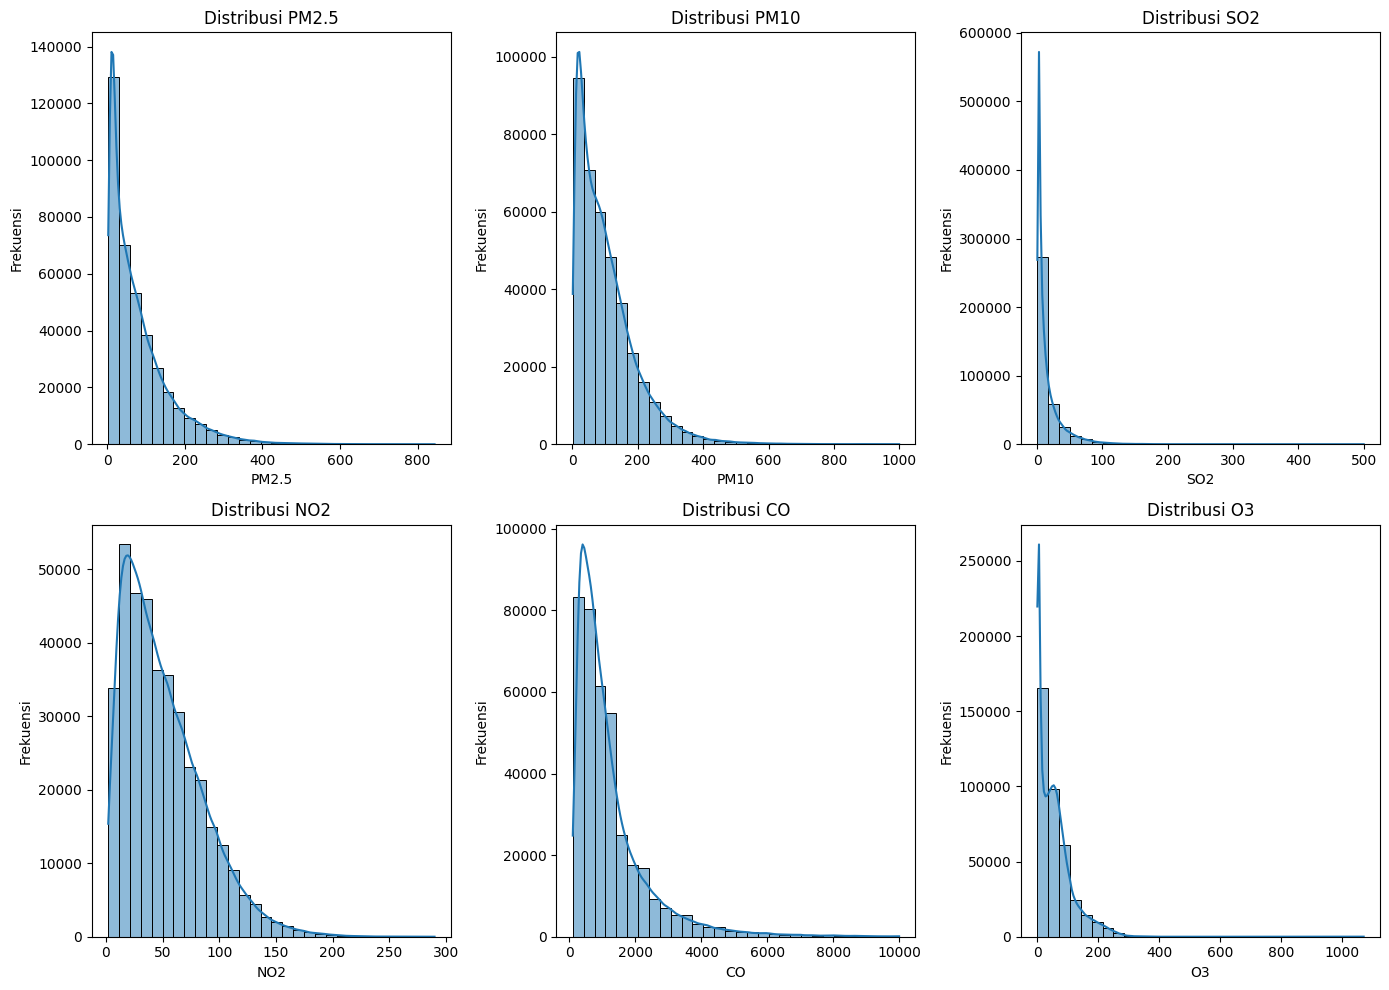

In [38]:
plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.histplot(combined_df[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

 Mengidentifikasi polutan mana yang paling umum atau paling jarang di seluruh data. Misalnya, jika PM2.5 menunjukkan distribusi yang sangat miring, ini mungkin menunjukkan bahwa sebagian besar lokasi mengalami tingkat polusi yang tinggi.

## Pertanyaan 2 :Pola Musiman dari Kualitas Udara

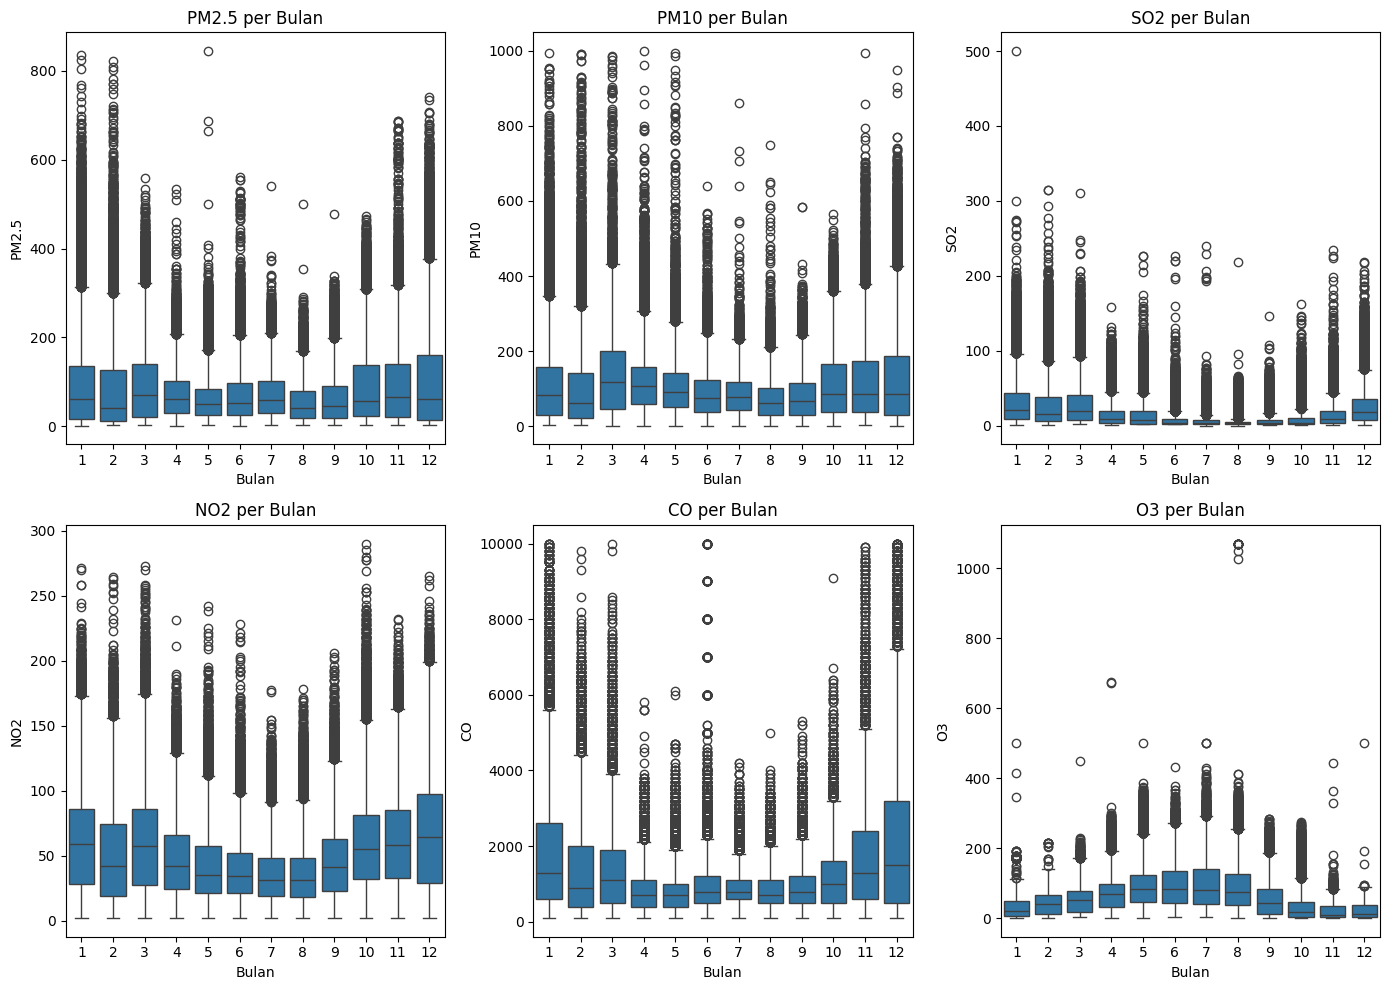

In [39]:
combined_df['month'] = combined_df.index.month

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.boxplot(data=combined_df, x='month', y=column)
    plt.title(f'{column} per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

 Polutan tertentu mungkin menunjukkan pola musiman yang jelas, seperti peningkatan PM2.5 selama musim tertentu atau penurunan SO2 pada bulan-bulan tertentu. hal Ini bisa membantu memahami bagaimana faktor musiman mempengaruhi kualitas udar

## Pertanyaan 3 :Korelasi Antara Polutan

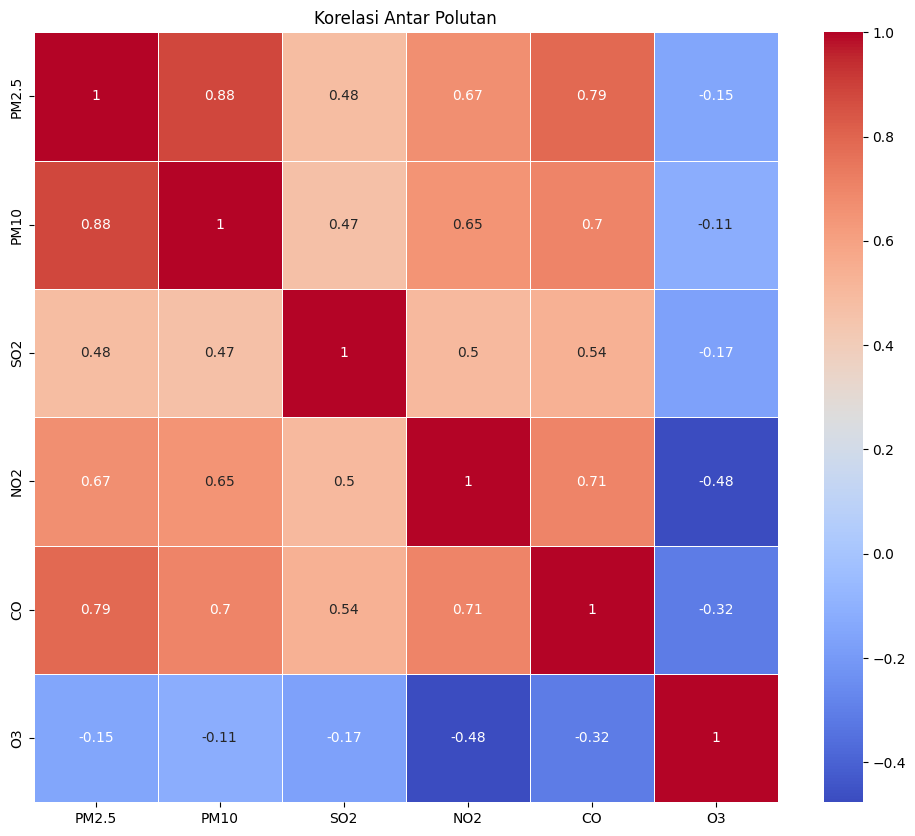

In [40]:
plt.figure(figsize=(12, 10))
corr_matrix = combined_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Polutan')
plt.show()

Mengidentifikasi hubungan antara berbagai polutan. Misalnya, jika PM2.5 dan NO2 memiliki korelasi tinggi, ini mungkin menunjukkan bahwa keduanya sering meningkat secara bersamaan.

## Pertanyaan 4 :Pengaruh Faktor Cuaca Terhadap Kualitas Udara


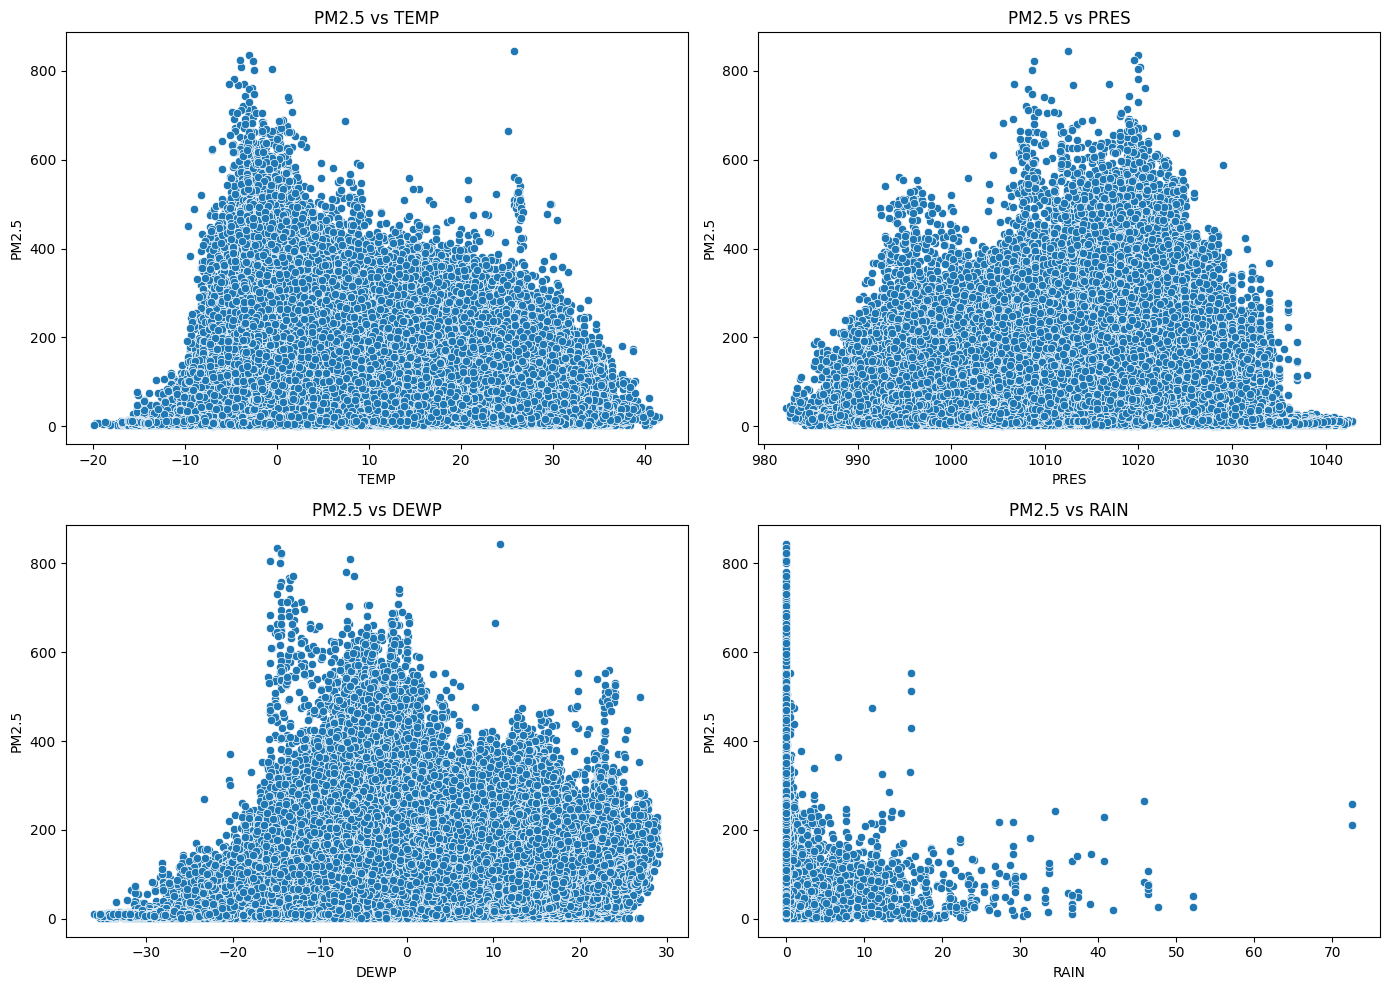

In [41]:
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN']
plt.figure(figsize=(14, 10))
for factor in weather_factors:
    plt.subplot(2, 2, weather_factors.index(factor) + 1)
    sns.scatterplot(data=combined_df, x=factor, y='PM2.5')
    plt.title(f'PM2.5 vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('PM2.5')

plt.tight_layout()
plt.show()

Faktor cuaca seperti suhu, tekanan, dan kelembaban mungkin berhubungan dengan tingkat polusi. Misalnya, suhu yang lebih tinggi mungkin berhubungan dengan peningkatan O3, sedangkan curah hujan tinggi bisa berhubungan dengan penurunan konsentrasi PM2.5.

## Pertanyaan 5 :Perbedaan kualitas udara berdasarkan waktu hari


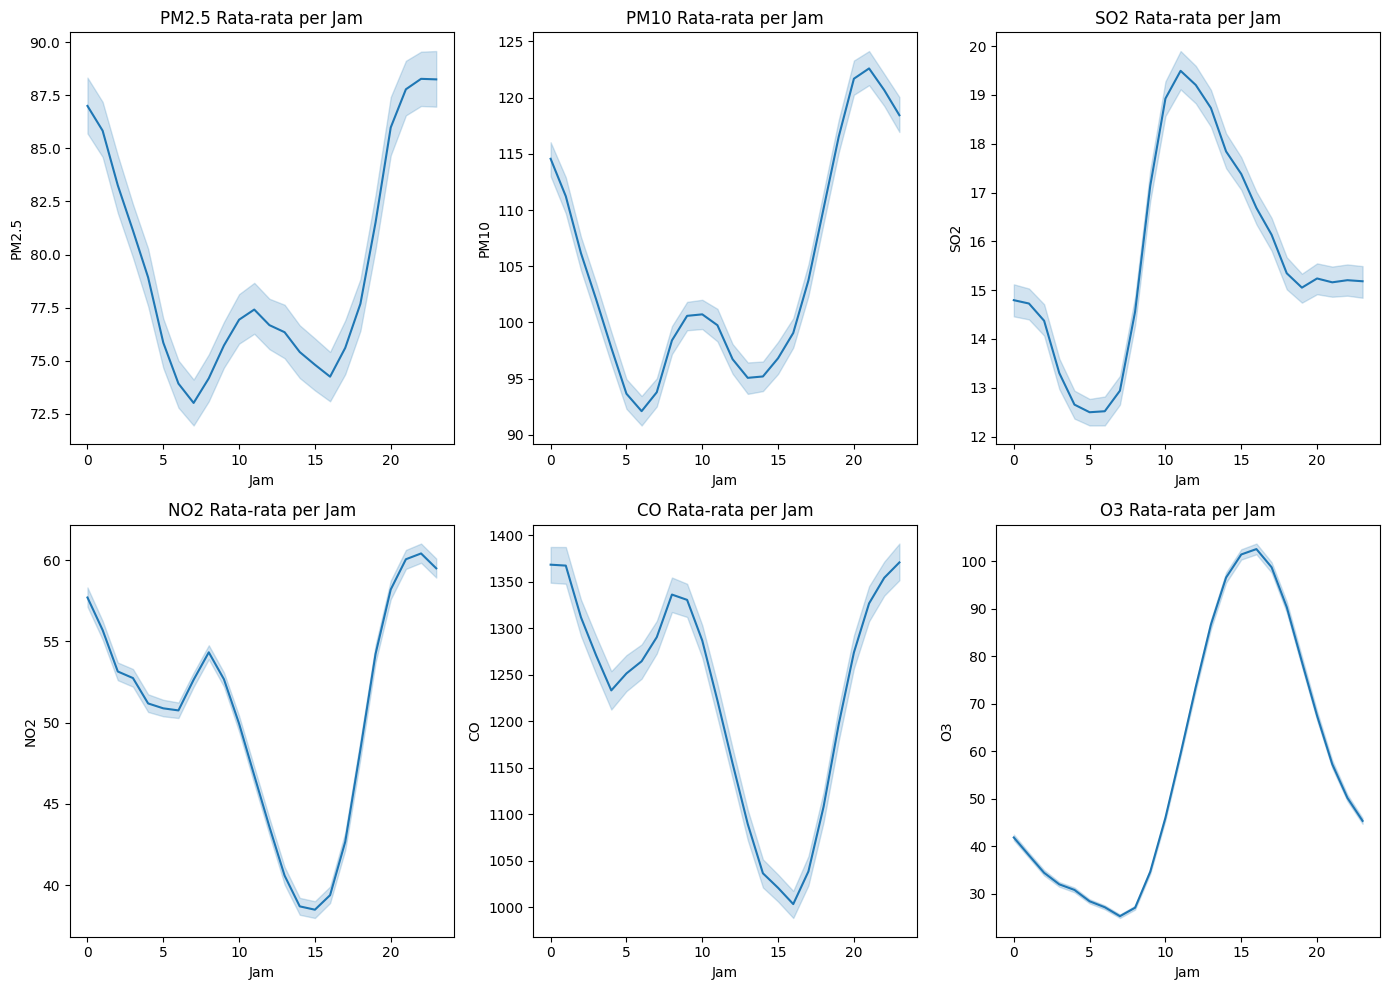

In [42]:
combined_df['hour'] = combined_df.index.hour

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.lineplot(data=combined_df, x='hour', y=column, estimator='mean')
    plt.title(f'{column} Rata-rata per Jam')
    plt.xlabel('Jam')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Kualitas udara dapat bervariasi sepanjang hari. Misalnya, tingkat polusi bisa lebih tinggi pada jam-jam sibuk (pagi dan sore hari) dan lebih rendah di malam hari.

## Pertanyaan 6 :Perbedaan kualitas udara di lokasi yang berbeda

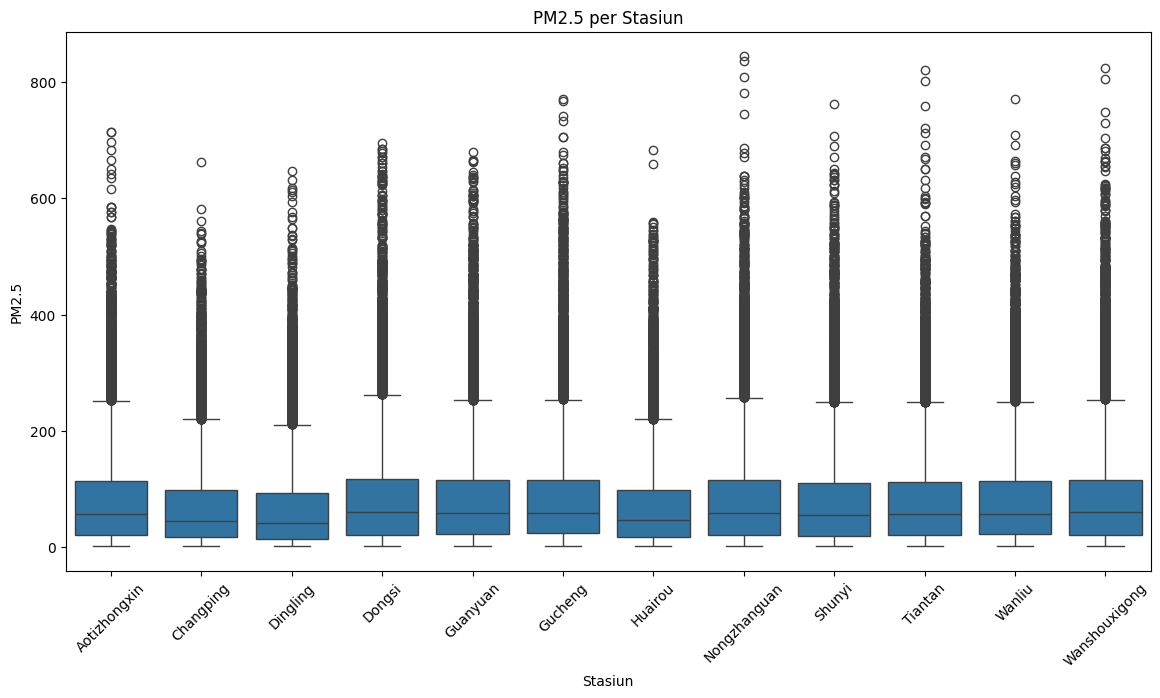

In [43]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df, x='station', y='PM2.5')
plt.title('PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()


Ada kemungkinan perbedaan signifikan dalam kualitas udara antar lokasi. Beberapa stasiun mungkin melaporkan tingkat polusi yang jauh lebih tinggi daripada yang lain, yang mungkin terkait dengan aktivitas industri, lalu lintas, atau faktor lokal lainnya.

## Pertanyaan 7 :Hubungan antara kecepatan angin dan kulaitas udara

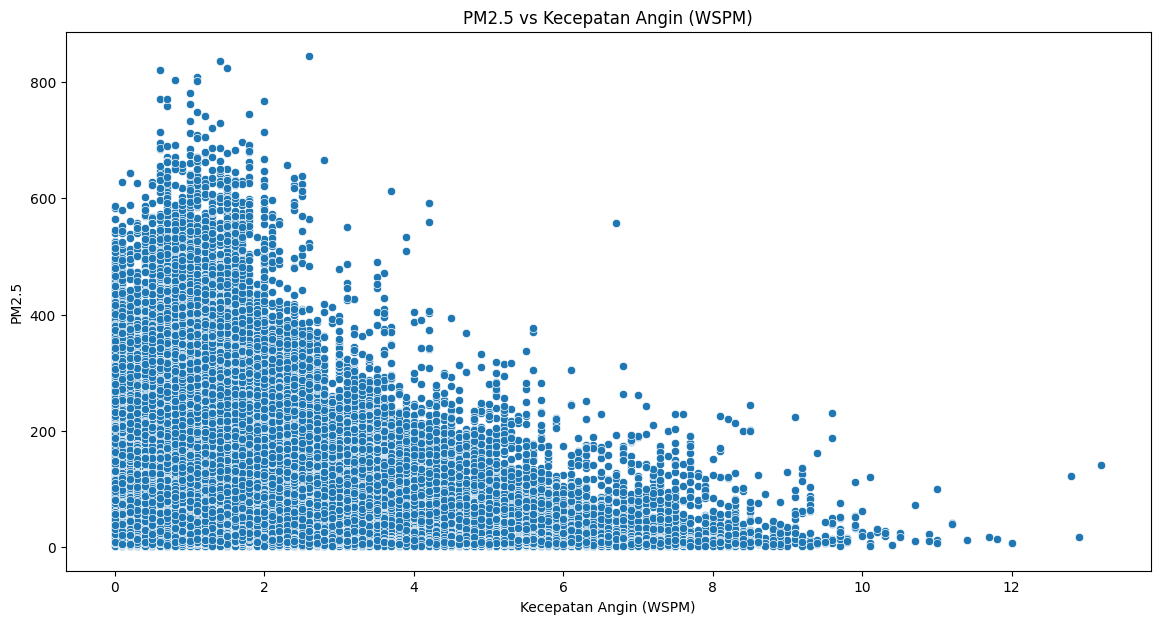

In [44]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=combined_df, x='WSPM', y='PM2.5')
plt.title('PM2.5 vs Kecepatan Angin (WSPM)')
plt.xlabel('Kecepatan Angin (WSPM)')
plt.ylabel('PM2.5')
plt.show()

Kecepatan angin mungkin mempengaruhi konsentrasi polutan udara. Misalnya, angin yang lebih kencang mungkin mengurangi konsentrasi polutan dengan menyebarkannya lebih cepat.

## Pertanyaan 8 :Fluktuasi harian dalam kualitas udara

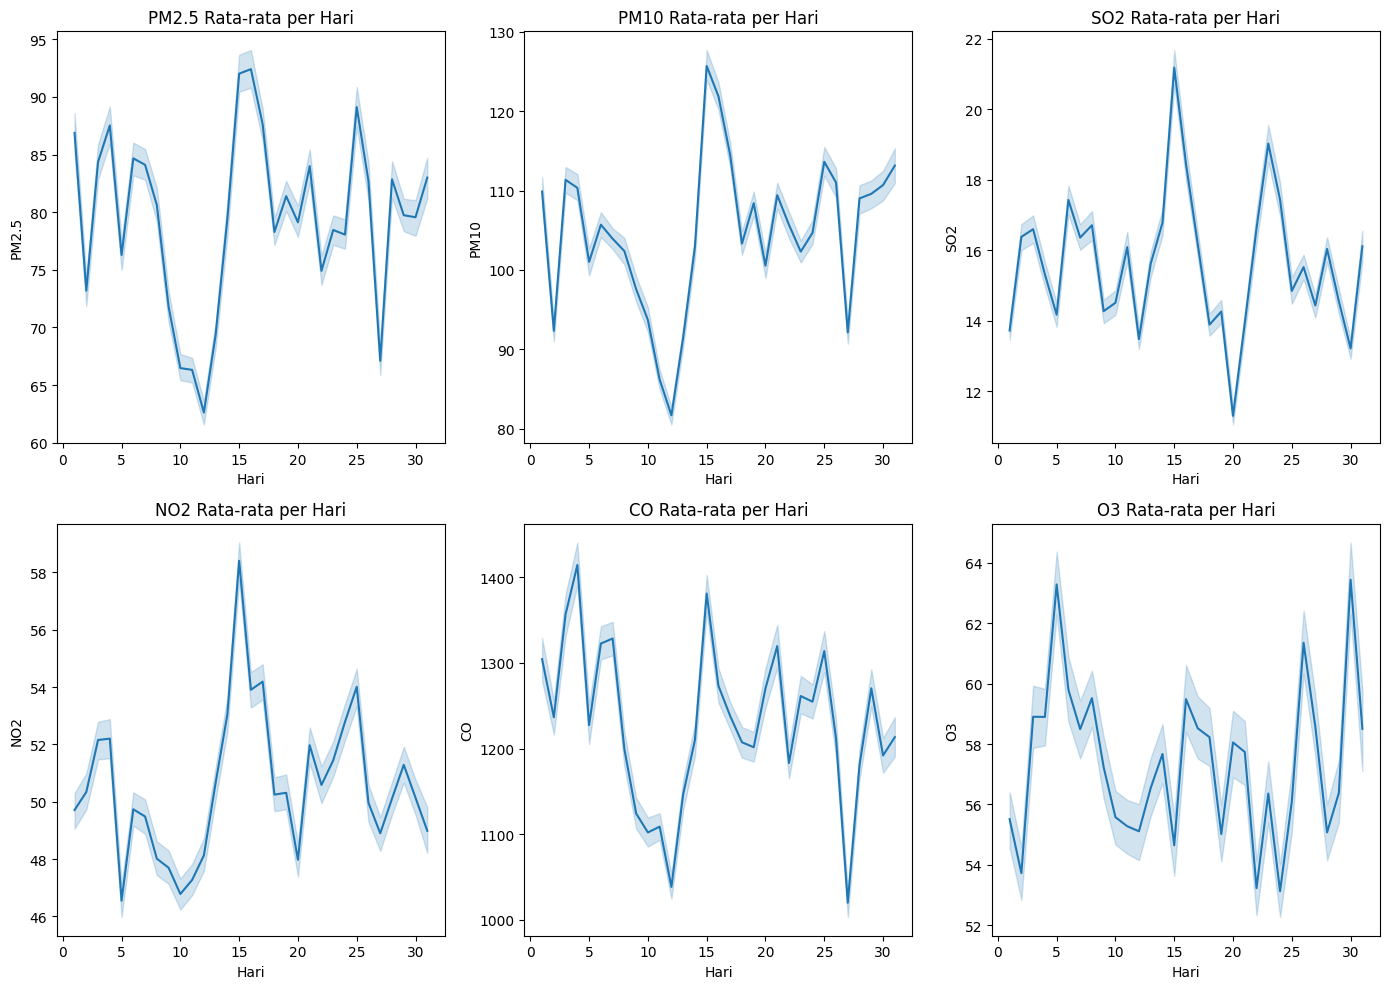

In [45]:
combined_df['day'] = combined_df.index.day

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.lineplot(data=combined_df, x='day', y=column, estimator='mean')
    plt.title(f'{column} Rata-rata per Hari')
    plt.xlabel('Hari')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()

Ada kemungkinan fluktuasi harian dalam kualitas udara. Misalnya, konsentrasi polutan bisa menunjukkan pola harian tertentu, seperti peningkatan selama jam-jam sibuk.

## Pertanyaan 9: Tren jangka panjang dalam kualitas udara

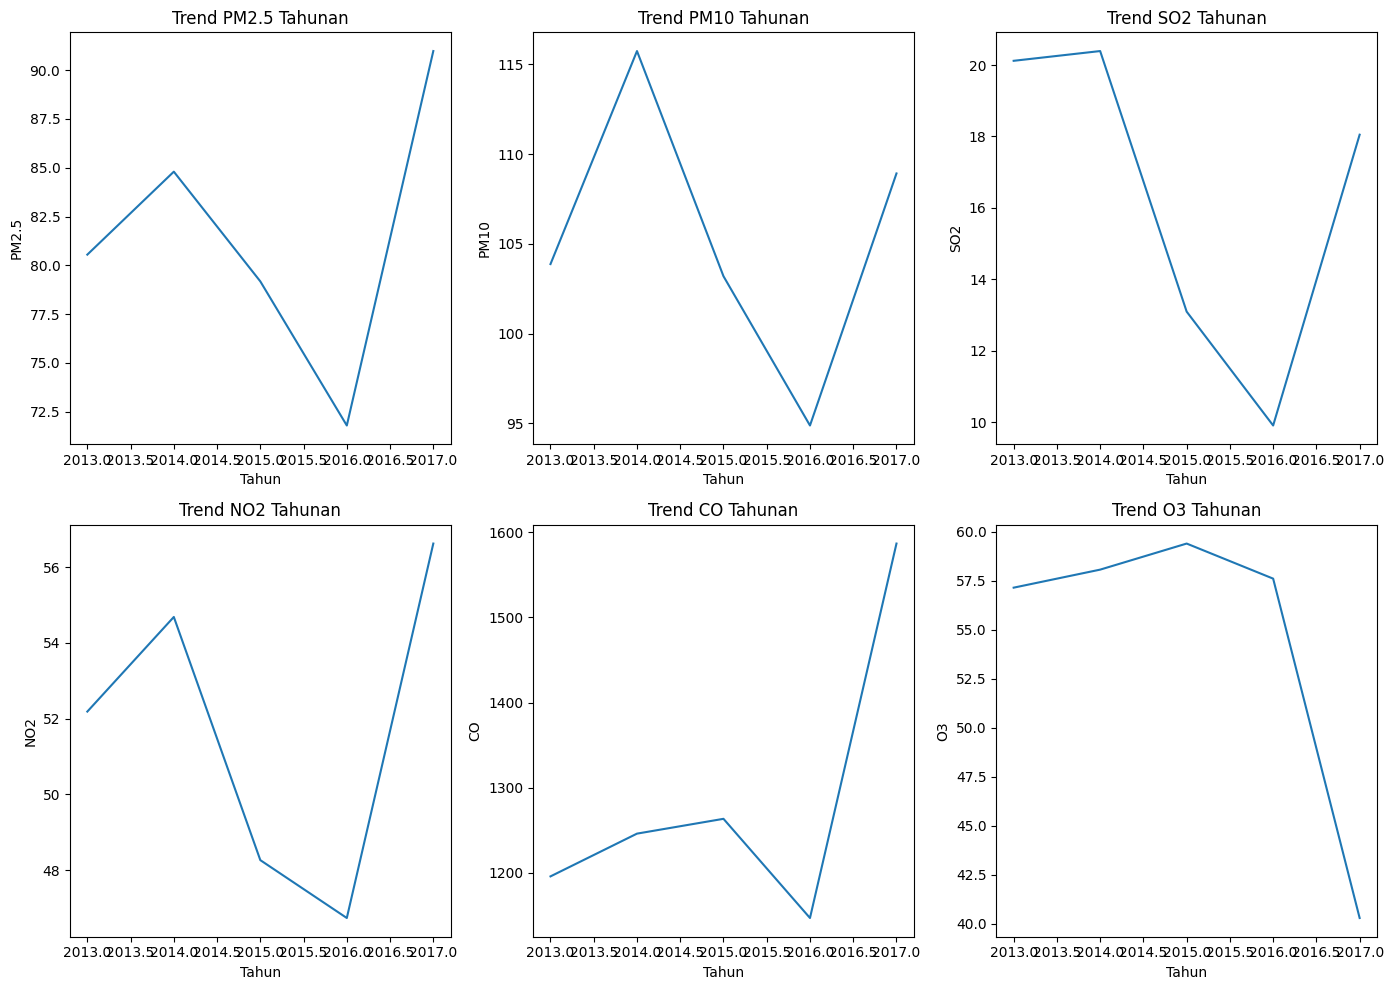

In [46]:
combined_df['year'] = combined_df.index.year

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.lineplot(data=combined_df.groupby('year')[column].mean().reset_index(), x='year', y=column)
    plt.title(f'Trend {column} Tahunan')
    plt.xlabel('Tahun')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


 Mengidentifikasi tren jangka panjang dalam kualitas udara, seperti peningkatan atau penurunan polutan dari tahun ke tahun. Ini bisa menunjukkan dampak dari kebijakan lingkungan, perubahan industri, atau tren lain yang relevan.

## Pertanyaan 10: Korelasi antara faktor lingkungan dan kualitas udara

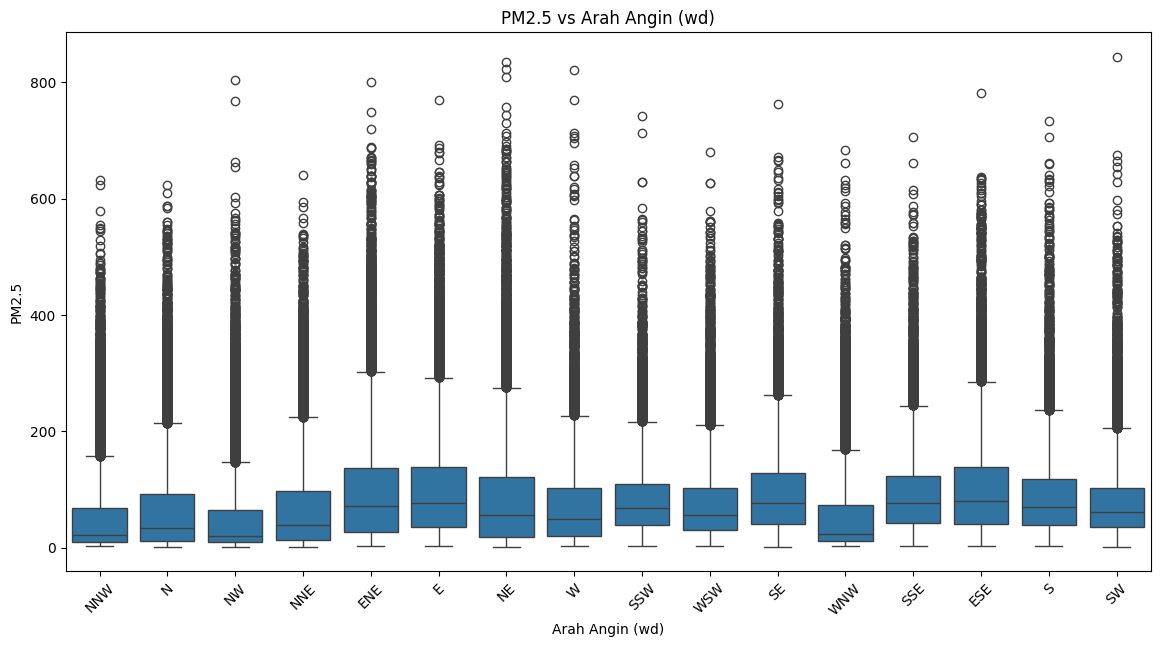

In [47]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df, x='wd', y='PM2.5')
plt.title('PM2.5 vs Arah Angin (wd)')
plt.xlabel('Arah Angin (wd)')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()

Korelasi antara arah angin dan polutan dapat memberikan wawasan tentang bagaimana arah angin mempengaruhi distribusi polutan. Misalnya, arah angin dominan mungkin membawa polutan dari sumber tertentu ke area lain.

## Conclusion

- Kualitas Udara Variatif: Kualitas udara bervariasi berdasarkan lokasi, waktu, dan kondisi cuaca. Beberapa polutan mungkin menunjukkan pola musiman atau tren jangka panjang tertentu.
- Faktor Lingkungan: Faktor lingkungan seperti suhu, kelembaban, kecepatan angin, dan arah angin mempengaruhi kualitas udara, dan hubungan ini harus dipertimbangkan dalam analisis lebih lanjut.
- Perbedaan Lokasi: Ada perbedaan signifikan dalam kualitas udara antara lokasi, yang mungkin menunjukkan adanya sumber polusi lokal yang perlu diperhatikan.